# Boston Housing Prices: Univariate Linear Regression

We'll be analyzing the features that affected house prices and building a univariate regression model in numpy using a data set consisting of Boston housing data collected in 1978. Each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

The dataset for this project originates from the UCI Machine Learning Repository. 

### Step 1: Import python packages and datasets

In [51]:
# Data imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Dataset import
from sklearn.datasets import load_boston

# Load the housing dataset
boston = load_boston()

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Step 2: Generate descriptive statistics using .head(), .describe(), and .info()

In [52]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [53]:
# reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

# label columns
boston_df.columns = boston.feature_names

#show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [54]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [55]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


### Step 3: Visualizing current data

Text(0, 0.5, 'Number of houses')

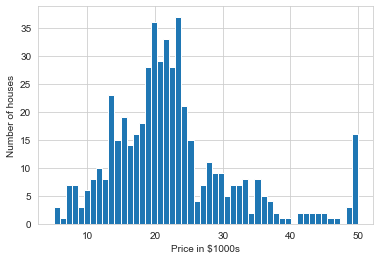

In [56]:
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

In [57]:
# Create a price column in our dataset to easily create visalizations 
boston_df['Price'] = boston.target

# Show result
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we'll go through each one of our features or variables and plot them against the price

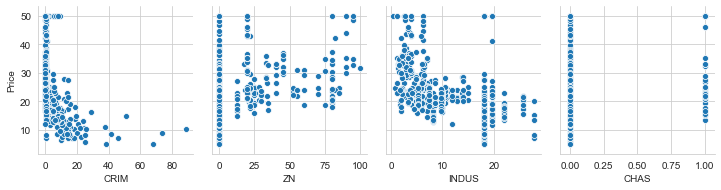

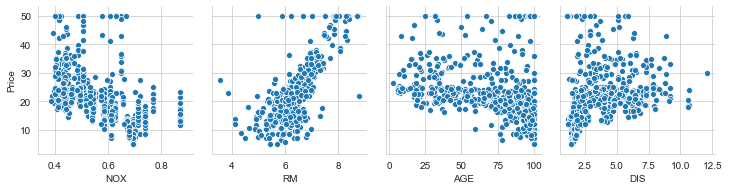

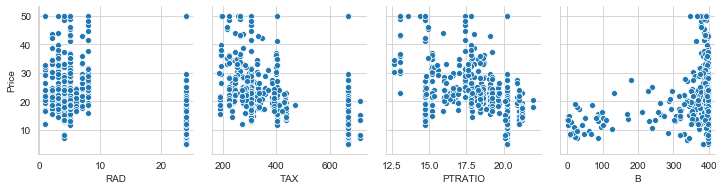

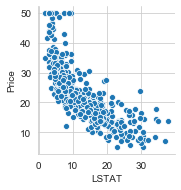

In [58]:
# Create pairplots to see which variables are correlated price
pp1 = sns.pairplot(data=boston_df,
                  y_vars=['Price'],
                  x_vars=['CRIM', 'ZN', 'INDUS','CHAS'])

pp2 = sns.pairplot(data=boston_df,
                  y_vars=['Price'],
                  x_vars=['NOX', 'RM', 'AGE', 'DIS'])
pp3 = sns.pairplot(data=boston_df,
                  y_vars=['Price'],
                  x_vars=['RAD', 'TAX', 'PTRATIO', 'B'])
pp4 = sns.pairplot(data=boston_df,
                  y_vars=['Price'],
                  x_vars=['LSTAT'])

It seems as though the average number of rooms (RM), the weighted distances to five Boston employment centres (DIS), and % lower status of the population LSTAT have an interesting correlation with the house price. Let's look at each of these plots and add lines of best fit. 

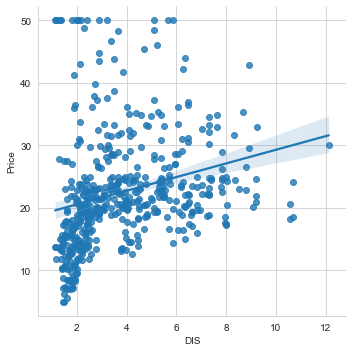

In [59]:
# Using seabron to create a linear fit
# weighted distance from employment centers (DIS)
sns.lmplot('DIS','Price',data = boston_df)

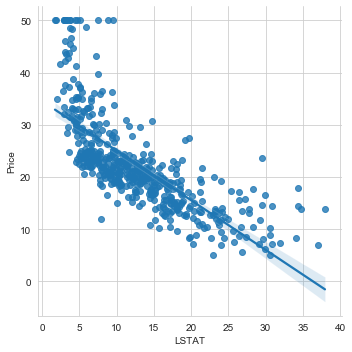

In [60]:
# Using seabron to create a linear fit  
# %lower status of the population
sns.lmplot('LSTAT','Price',data = boston_df)

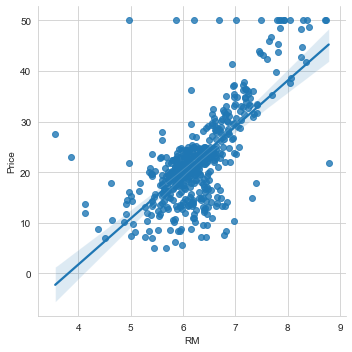

In [61]:
# Using seabron to create a linear fit
# avg number of rooms per home (RM)
sns.lmplot('RM','Price',data = boston_df)

The average number of rooms per home is the most correlated with the housing price. Therefore, we will use RM for our single variable regression using the least squares method.

### Step 4: Using Numpy for a Univariate Linear Regression

Numpy has a built in Least Square Method in its linear algebra library. 

We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array. An easy way to do this is by using numpy's built-in vertical stack tool, vstack.

In [62]:
# Set up X as median room values
X = boston_df.RM

# Use v to make X two-dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.
Y = boston_df.Price


In [63]:
# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ] )
X = X.astype(np.float64)

In [64]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y)[0]

Let's plot it all together. Note that we use the original format of the boston information. We only did our matrix transformations to utilize the numpy least square method.

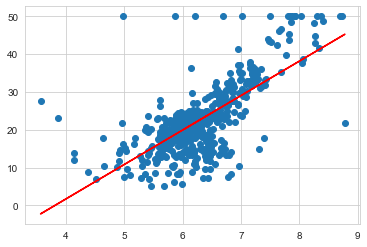

In [65]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

### Step 5: Getting the error 

We've just completed a single variable regression using the least squares method with Python. 

Let's see if we can find the error in our fitted line. 

We need to get the root mean squared error of the line we just fitted.

In [66]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print("The root mean squared error was %.2f " %rmse)

The root mean squared error was 6.60 


The root mean squared error was 6.60 

Since the root mean squared error (RMSE) corresponds approximately to the standard deviation.

We can say that the price of a house won't vary more than 2 times the root mean squared error 95% of the time. 

Thus we can reasonably expect a house price to be within $13,200 of our line fit.